In [1]:
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load model đã được huấn luyện từ file
model = tf.keras.models.load_model("drive/MyDrive/Drive_thành_viên/BAN_CHỦ_NHIỆM/Danny/data _rain/dataset/trained_model.h5")

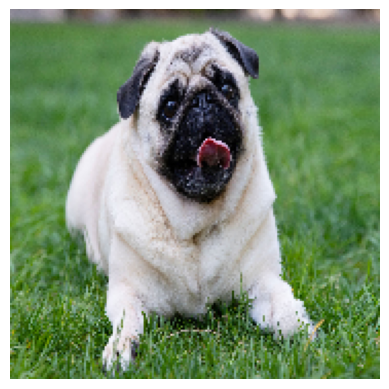

1/1 [==============================] - 0s 35ms/step
This image is 3.11% cat and 96.89% dog.


In [4]:
image_size = (180, 180)
batch_size = 128

# Đường dẫn đến ảnh cần kiểm tra
image_path = "drive/MyDrive/Drive_thành_viên/BAN_CHỦ_NHIỆM/Danny/data _rain/Test/4.jpg"

# Đọc và hiển thị ảnh
img = keras.utils.load_img(image_path, target_size=image_size)
plt.imshow(img)
plt.axis('off')
plt.show()

# Chuẩn hóa và mở rộng chiều của ảnh
img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Dự đoán và in kết quả
predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

In [5]:
# Define image size and batch size
image_size = (180, 180)
batch_size = 128

# Function to preprocess the input image
def preprocess_image(image):
    img = cv2.resize(image, image_size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

# Function to predict and display the result
def predict_and_display(image):
    img_array = preprocess_image(image)
    predictions = model.predict(img_array)
    score = float(predictions[0])
    label = "Cat" if score < 0.5 else "Dog"
    confidence = 100 * max(score, 1 - score)
    cv2.putText(image, f"{label}: {confidence:.2f}%", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Camera", image)

# Open camera
cap = cv2.VideoCapture(0)  # 0 refers to the default camera, you can change it to a different camera index if needed

while True:
    ret, frame = cap.read()
    if not ret:
        break

    predict_and_display(frame)

    # Press 'q' to quit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()